<a href="https://colab.research.google.com/github/VaibhavBhusawale/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/final_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.
Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.


Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

Before starting the data exploration to understand the relation between the independent features it is important to focus on Hypothesis Testing.

Hypothesis Testing is the first step we should take towards understanding the dataset and the business problem. The main aim of Hypothesis Testing is to give us a head-start towards understanding the problem.

1. Gender: Males are more likely to buy Vehicle Insurance.

2. Age: It is generally said that it is profitable to buy Insurance as early as possible so more likely between Customers of ages of 25-40 are likely to buy Insurance.

3. Driving_License: Customers who generally have Driving_License take Insurance.

4. Previously_Insured: Customers generally take One Vehicle insurance.

5. Vehicle_Age: The more the age of the vehicle the better.

6. Annual_Premium: Customers generally opt for Insurance where the premium is not too high

#Exploratory Data Analysis (EDA)

In [1]:
# Let’s start by loading the required libraries and data
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')




In [2]:
# Importing data

from google.colab import drive
drive.mount ('/content/drive')


Mounted at /content/drive


In [3]:
# Read the health insurance data set 
path = '/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'

df = pd.read_csv(path)

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [6]:
df.shape

(381109, 12)

In [7]:
# Find missing values in the dataset if any.
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In our dataset we zero null values observed

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [10]:
# duplicate
len(df[df.duplicated()])

0

In [11]:
df.drop("id",axis =1).quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,0.00,0.05,0.50,0.95,0.99,1.00
Age,20.0,21.0,36.0,69.0,77.0,85.0
Driving_License,0.0,1.0,1.0,1.0,1.0,1.0
Region_Code,0.0,5.0,28.0,47.0,50.0,52.0
Previously_Insured,0.0,0.0,0.0,1.0,1.0,1.0
Annual_Premium,2630.0,2630.0,31669.0,55176.0,72963.0,540165.0
Policy_Sales_Channel,1.0,26.0,133.0,160.0,160.0,163.0
Vintage,10.0,24.0,154.0,285.0,297.0,299.0
Response,0.0,0.0,0.0,1.0,1.0,1.0


# *Visual Inspection*


# 1.Target Variable Response

*   Wheather the check Customer Response For the Insurance intrested or not Intrested 



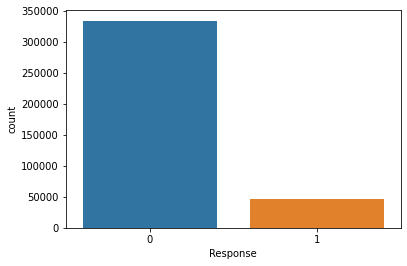

In [12]:
sns.countplot(df.Response)

In [13]:
df.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

# 2.Age Distribution of Customers

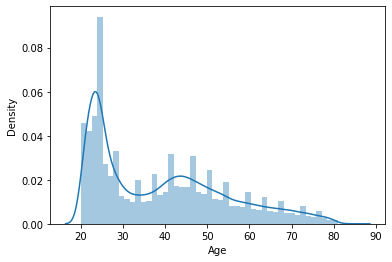

In [14]:
sns.distplot(df.Age)

The above age plot clearly shows that the age between 20 to 45 maximum intrested for insurance

# 3.Gender Wise Customers Response

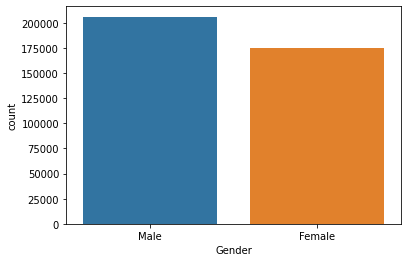

In [15]:
sns.countplot(df.Gender)

In [16]:
new_df = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

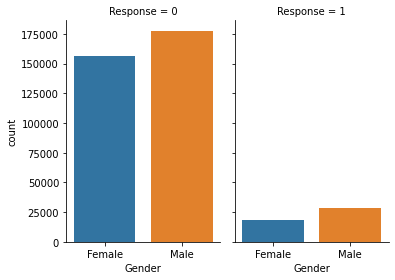

In [17]:
g = sns.catplot(x="Gender", y="count",col="Response",data=new_df, kind="bar",height=4, aspect=.7);

As we can see that Males are more likely to buy Vehicle Insurance which proves our Hypothesis also.

# 4. Age vs Annual Premium  

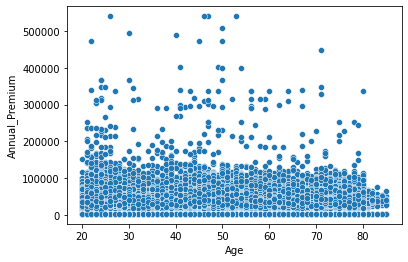

In [18]:
sns.scatterplot(x=df['Age'],y=df['Annual_Premium'])

From the scatter plot we observed age of 20 to 80 people maximum annual premium is approximately 130000

# 5. Driving License Gender wise Distribution

In [19]:
new_df = df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

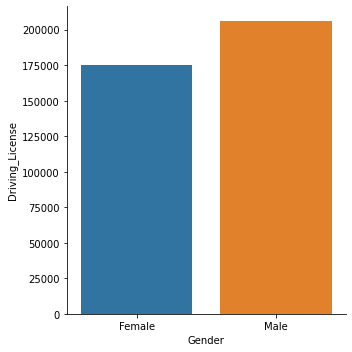

In [20]:
sns.catplot(x='Gender',y='Driving_License',data=new_df,kind='bar')

As per the above graph Male have more Driving license as compair to Female

# 6. Customers having Vehicle insurance already

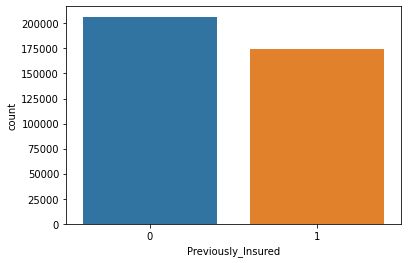

In [21]:
sns.countplot(df.Previously_Insured)

# 7.Vehicle Age

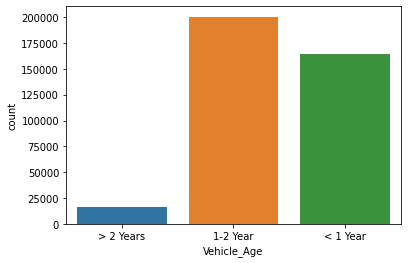

In [22]:
sns.countplot(df.Vehicle_Age)

In [23]:
new_df = df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
new_df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


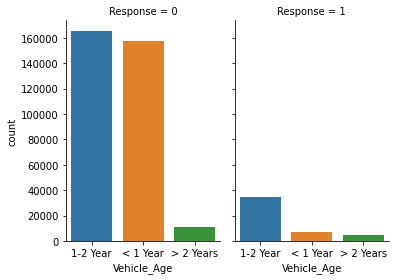

In [24]:
g = sns.catplot(x='Vehicle_Age',y='count',col='Response',data=new_df,kind="bar",height=4, aspect=.7)

From the above figure, it is clear that the more the age of the vehicle the better as it makes the vehicle insurance cheaper

To know more about the correlation between Vehicle insurance and Vehicle age refer to this link

Feel free to dig deeper and find more insights from the dataset. We will move to the next section that is Data Cleaning.

# 8.Damage Vehicle and Response

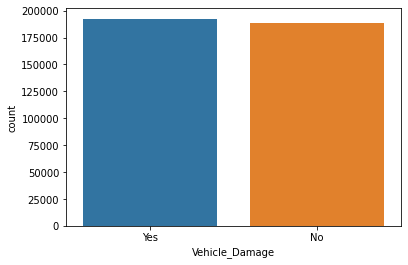

In [25]:
sns.countplot(df.Vehicle_Damage)

In [26]:
new_df=df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
new_df

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


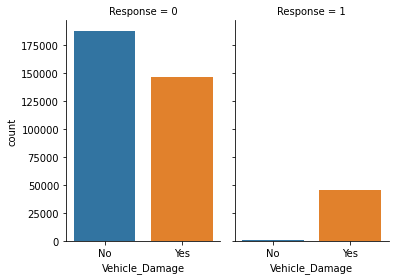

In [27]:
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=new_df, kind="bar",
                height=4, aspect=.7);

We plotted Vehicle damage vs Response the graph shows
1.	when customer is not interested(response=0) Maximum vehicle No vehicle damage and not response and also vehicle damaged but they don’t gave Response
2.	If we see the customer interested (Response=1) Minimum people no vehicle damage minimum response


# 8. Annual Premium Distribution

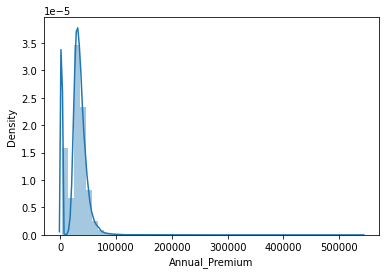

In [28]:
sns.distplot(df.Annual_Premium)

maximum density of annual premium is below 100000

# 9. Vintage
Number of Days, Customer has been associated with the company

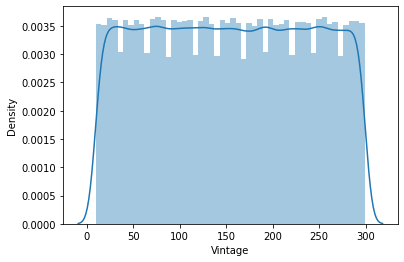

In [29]:
sns.distplot(df.Vintage)

# 10.check the Outliers by plotting Boxplot

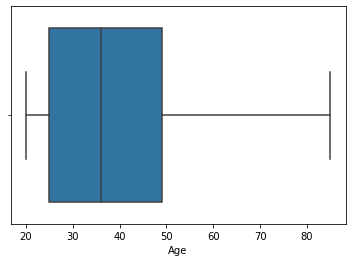

In [30]:
sns.boxplot(x=df["Age"])

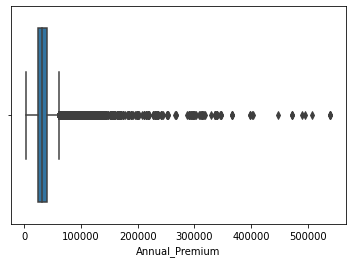

In [31]:
sns.boxplot(x=df["Annual_Premium"])

Here in Annual premium we already see the maximium premium is below 100000 so thats why we observed outliers

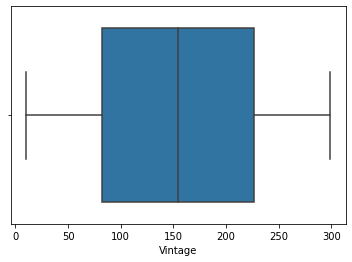

In [32]:
sns.boxplot(x=df["Vintage"])

In [33]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [34]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# 11.Let us plot a histogram for each numerical and variable and analyze the distribution.

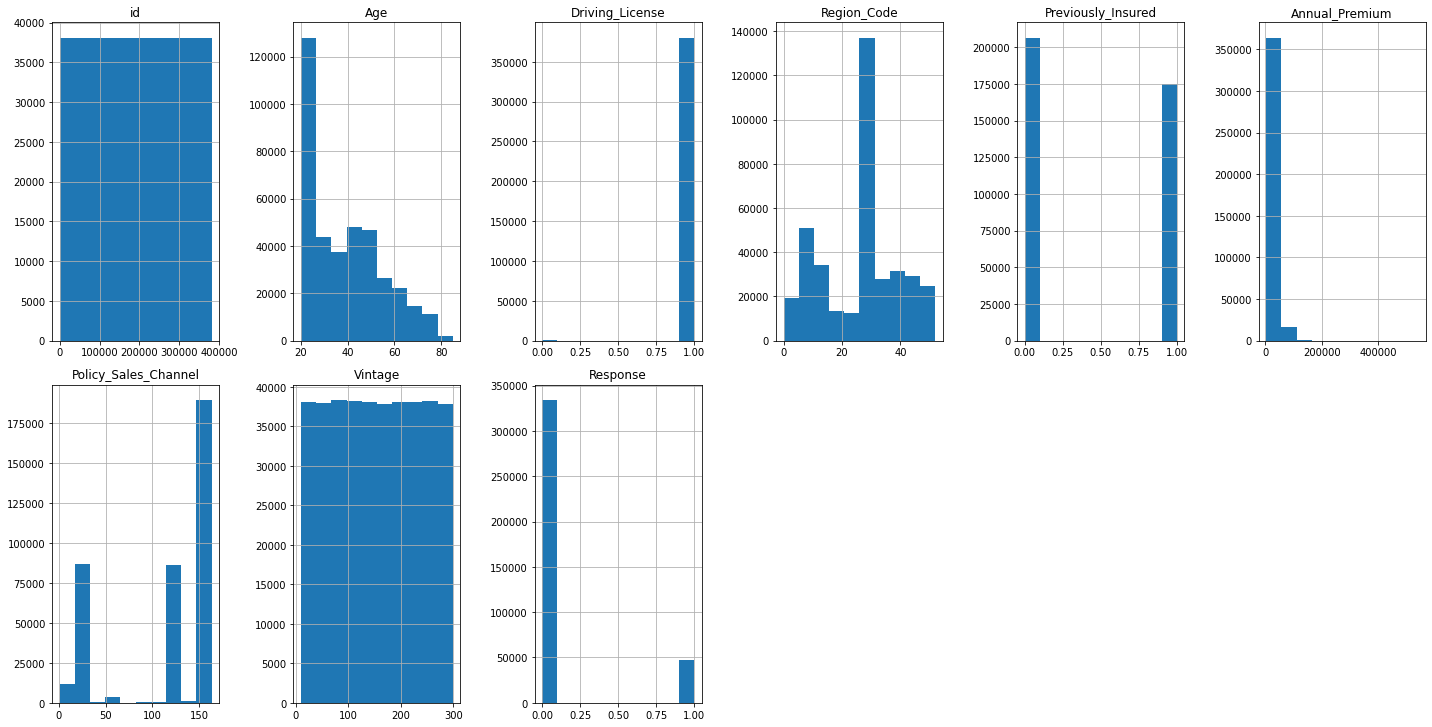

In [35]:
df.hist(figsize=(20,15),layout=(3,6))
plt.tight_layout()
plt.show()

From the above plot we can see that:

– Age column is Right-Skewed.

– Response variable has an unbalanced ratio in labels. So we will apply some techniques later in the model building stage.

– Diriving_license column has an unbalanced ratio between the labels.

 

As we know that Diriving_license column has an unbalanced ratio between the labels so we can delete this column.

In [36]:
df.drop('Driving_License',axis=1,inplace=True)

#Feature Selection

This step typically involves imputing missing values, treating outliers, and performing Encoding. We can perform encoding either by manually using the map() or by using LabelEncoder().

In [37]:
df.columns

Index(['id', 'Gender', 'Age', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [38]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured',
            'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years',
            'Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [39]:
gender_map={'Male':0,'Female':1}
df['Gender']=df['Gender'].map(gender_map)

In [40]:
vehicle_age_map={'1-2 Year':1,'< 1 Year':0,'> 2 Years':2}
df['Vehicle_Age']=df['Vehicle_Age'].map(vehicle_age_map)

In [41]:
Vehicle_Damage_map={'Yes':0,'No':1}
df['Vehicle_Damage']=df['Vehicle_Damage'].map(Vehicle_Damage_map)

In [42]:
df=pd.get_dummies(df,drop_first=True)

In [43]:
df.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,28.0,0,2,0,40454.0,26.0,217,1
1,2,0,76,3.0,0,1,1,33536.0,26.0,183,0
2,3,0,47,28.0,0,2,0,38294.0,26.0,27,1
3,4,0,21,11.0,1,0,1,28619.0,152.0,203,0
4,5,1,29,41.0,1,0,1,27496.0,152.0,39,0


In [44]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [45]:
def target_summary_with_num(dataframe, target, numerical_columns):
    print(df.groupby(target).agg({numerical_columns: "mean"}), end="\n\n\n")

In [46]:
for col in numerical_columns:
    target_summary_with_num(df, "Response", col)

                Age
Response           
0         38.178227
1         43.435560


          Region_Code
Response             
0           26.336544
1           26.762963


          Annual_Premium
Response                
0           30419.160276
1           31604.092742


             Vintage
Response            
0         154.380243
1         154.112246




# Handling Outliers

In [47]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 3 * interquantile_range
    low_limit = quartile1 - 3 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [48]:
for col in numerical_columns:
    print(f"{col} : {check_outlier(df,col)}")

Age : False
Region_Code : False
Annual_Premium : True
Vintage : False


In [49]:
def grab_outliers(df, col_name, index=False):
    low, up = outlier_thresholds(df, col_name)

    if df[((df[col_name] < low) | (df[col_name] > up))].shape[0] > 10:
        print(df[((df[col_name] < low) | (df[col_name] > up))].head())
    else:
        print(df[((df[col_name] < low) | (df[col_name] > up))])

    if index:
        outlier_index = df[((df[col_name] < low) | (df[col_name] > up))].index
        return outlier_index

In [50]:
for col in numerical_columns:
    col, grab_outliers(df, col)

Empty DataFrame
Columns: [id, Gender, Age, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []
Empty DataFrame
Columns: [id, Gender, Age, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []
          id  Gender  Age  Region_Code  Previously_Insured  Vehicle_Age  \
1412    1413       1   41         28.0                   0            1   
11319  11320       1   50         46.0                   1            1   
13426  13427       1   47         28.0                   0            1   
15024  15025       1   32         28.0                   0            1   
25532  25533       0   50         28.0                   0            1   

       Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
1412                0        267698.0                 124.0       63         1  
11319               1        508073.0      

In [51]:
def replace_with_thresholds(df, variable):
    low_limit, up_limit = outlier_thresholds(df, variable)
    df.loc[(df[variable] < low_limit), variable] = low_limit
    df.loc[(df[variable] > up_limit), variable] = up_limit

In [52]:
for col in numerical_columns:
    replace_with_thresholds(df, col)

In [53]:
# CHECK OUTLIERS AGAIN
for col in df:
    print(f"{col} : {check_outlier(df,col)}")

id : False
Gender : False
Age : False
Region_Code : False
Previously_Insured : False
Vehicle_Age : False
Vehicle_Damage : False
Annual_Premium : False
Policy_Sales_Channel : False
Vintage : False
Response : False


In [54]:
df.drop("id",axis =1).quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,0.00,0.05,0.50,0.95,0.99,1.00
Gender,0.0,0.0,0.0,1.0,1.0,1.0
Age,20.0,21.0,36.0,69.0,77.0,85.0
Region_Code,0.0,5.0,28.0,47.0,50.0,52.0
Previously_Insured,0.0,0.0,0.0,1.0,1.0,1.0
Vehicle_Age,0.0,0.0,1.0,1.0,2.0,2.0
Vehicle_Damage,0.0,0.0,0.0,1.0,1.0,1.0
Annual_Premium,2630.0,2630.0,31669.0,55176.0,72963.0,212814.0
Policy_Sales_Channel,1.0,26.0,133.0,160.0,160.0,163.0
Vintage,10.0,24.0,154.0,285.0,297.0,299.0
Response,0.0,0.0,0.0,1.0,1.0,1.0


# Check the Multicollinearity and drop highly Correleted features


#1. Correletion matrix by using Heatmap

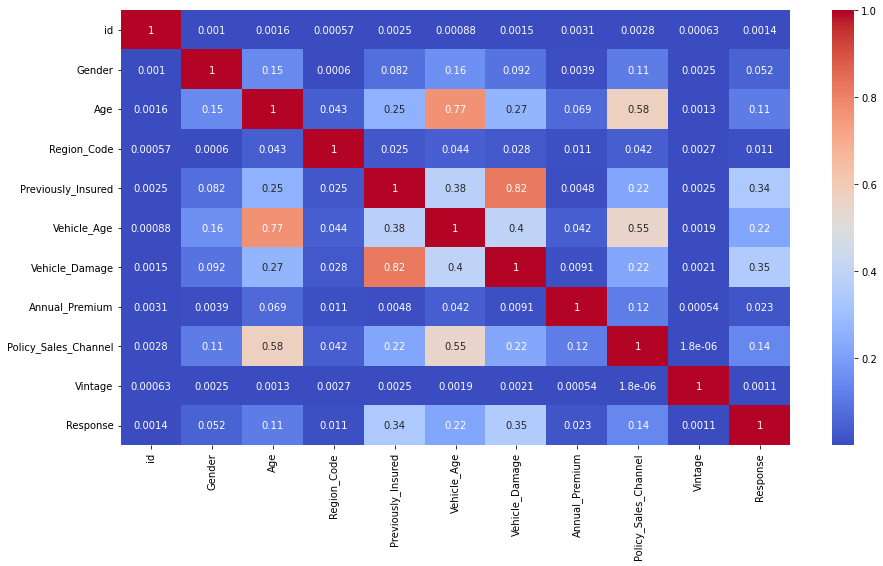

In [55]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [56]:
# Removing Multicollinearity
df = df.drop(['Vehicle_Damage','Policy_Sales_Channel','Vehicle_Age'], axis=1)

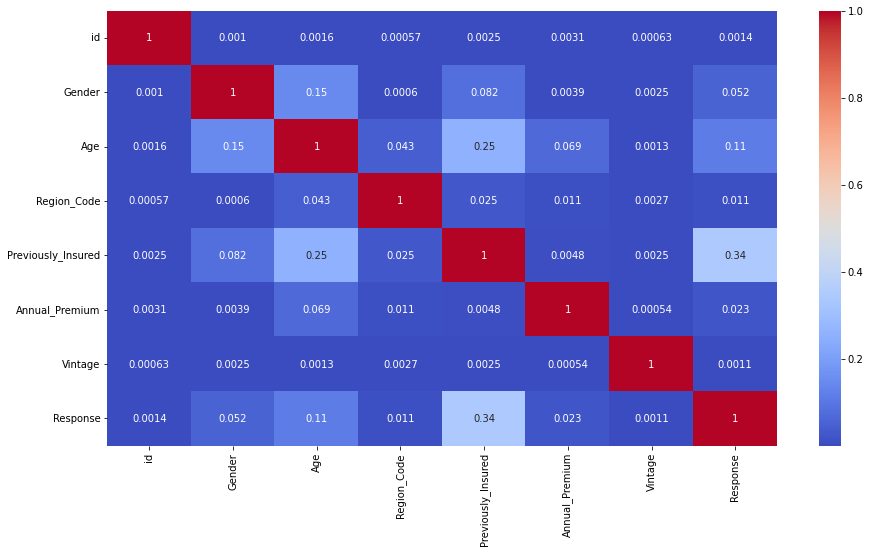

In [57]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# 2.Check Multicollinearity by using VIF

In [58]:
# By using vif remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [59]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.506606
1,Gender,1.779693
2,Age,5.431568
3,Region_Code,4.213812
4,Previously_Insured,1.786266
5,Annual_Premium,3.852985
6,Vintage,3.777094


#Fearure Scaling

In [60]:
df.columns

Index(['id', 'Gender', 'Age', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Vintage', 'Response'],
      dtype='object')

In [61]:
df["premium_age_ratio"] = df["Annual_Premium"]/df["Age"]

In [62]:
df["premium_vintage_ratio"] = df["Annual_Premium"]/df["Vintage"]

In [63]:
df

,id,Gender,Age,Region_Code,Previously_Insured,Annual_Premium,Vintage,Response,premium_age_ratio,premium_vintage_ratio
0,1,0,44,28.0,0,40454.0,217,1,919.409091,186.423963
1,2,0,76,3.0,0,33536.0,183,0,441.263158,183.256831
2,3,0,47,28.0,0,38294.0,27,1,814.765957,1418.296296
3,4,0,21,11.0,1,28619.0,203,0,1362.809524,140.980296
4,5,1,29,41.0,1,27496.0,39,0,948.137931,705.025641
...,...,...,...,...,...,...,...,...,...,...
381104,381105,0,74,26.0,1,30170.0,88,0,407.702703,342.840909
381105,381106,0,30,37.0,1,40016.0,131,0,1333.866667,305.465649
381106,381107,0,21,30.0,1,35118.0,161,0,1672.285714,218.124224
381107,381108,1,68,14.0,0,44617.0,74,0,656.132353,602.932432


# Standardization

In [64]:
num_feat = ['Age','Vintage','premium_age_ratio','premium_vintage_ratio']
ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])

#Minmax Scalar

In [65]:
mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

In [66]:
df=df.drop('id',axis=1)

In [67]:
df.head()

,Gender,Age,Region_Code,Previously_Insured,Annual_Premium,Vintage,Response,premium_age_ratio,premium_vintage_ratio
0,0,0.333777,28.0,0,0.179957,0.748795,1,0.023841,-0.327306
1,0,2.396751,3.0,0,0.147043,0.342443,0,-0.783760,-0.333165
2,0,0.527181,28.0,0,0.169680,-1.521998,1,-0.152904,1.951662
3,0,-1.148985,11.0,1,0.123649,0.581474,0,0.772756,-0.411377
4,1,-0.633242,41.0,1,0.118306,-1.378580,0,0.072365,0.632109


In [68]:
cat_feat = ['Gender', 'Previously_Insured']
for column in cat_feat:
    df[column] = df[column].astype('str')

In [69]:
ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])


mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

In [70]:
for column in cat_feat:
    df[column] = df[column].astype('str')

In [71]:
df

,Gender,Age,Region_Code,Previously_Insured,Annual_Premium,Vintage,Response,premium_age_ratio,premium_vintage_ratio
0,0,0.333777,28.0,0,0.179957,0.748795,1,0.023841,-0.327306
1,0,2.396751,3.0,0,0.147043,0.342443,0,-0.783760,-0.333165
2,0,0.527181,28.0,0,0.169680,-1.521998,1,-0.152904,1.951662
3,0,-1.148985,11.0,1,0.123649,0.581474,0,0.772756,-0.411377
4,1,-0.633242,41.0,1,0.118306,-1.378580,0,0.072365,0.632109
...,...,...,...,...,...,...,...,...,...
381104,0,2.267815,26.0,1,0.131028,-0.792954,0,-0.840444,-0.037934
381105,0,-0.568774,37.0,1,0.177873,-0.279037,0,0.723871,-0.107078
381106,0,-1.148985,30.0,1,0.154569,0.079509,0,1.295469,-0.268660
381107,1,1.881007,14.0,0,0.199763,-0.960275,0,-0.420840,0.443236


#Modeling

# 1.Logistic Regression

In [72]:
pip install CatBoost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [73]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

In [74]:
X=df.drop(['Response'],axis=1)
Y=df['Response'].astype('int')


In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30 ,random_state = 5)

In [76]:
X = X.fillna(X.mean())

In [77]:
X.shape, Y.shape

((381109, 8), (381109,))

In [78]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(266776, 8) (266776,)
(114333, 8) (114333,)


In [79]:
X_train.isnull().sum()

Gender                   0
Age                      0
Region_Code              0
Previously_Insured       0
Annual_Premium           0
Vintage                  0
premium_age_ratio        0
premium_vintage_ratio    0
dtype: int64

In [80]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [81]:
# Get the model coefficients
clf.coef_

array([[-1.50539075e-01, -3.57025075e-01,  2.86164245e-05,
        -5.55780757e+00,  8.30163794e+00,  2.61791638e-03,
        -8.47493153e-01,  5.28004366e-05]])

In [82]:
clf.intercept_

array([-2.35092163])

In [83]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [84]:
X_test

,Gender,Age,Region_Code,Previously_Insured,Annual_Premium,Vintage,premium_age_ratio,premium_vintage_ratio
56814,0,-1.084517,15.0,0,0.172791,1.370276,1.461125,-0.404332
168832,0,0.204841,3.0,1,0.186127,0.999778,0.149948,-0.347655
4864,0,0.011438,28.0,0,0.191561,-1.282967,0.328561,1.016154
255045,0,0.978456,36.0,0,0.147985,-0.565875,-0.473924,-0.088938
159217,0,1.945475,28.0,1,0.222362,0.736844,-0.320628,-0.249371
...,...,...,...,...,...,...,...,...
233800,1,-0.375370,2.0,0,0.126965,-1.187355,-0.028595,0.313895
64249,0,0.269309,29.0,0,0.000000,0.509764,-1.425759,-0.647492
261696,0,-0.181966,8.0,0,0.177421,-0.422456,0.343924,-0.051569
213797,1,1.687604,50.0,0,0.091658,0.079509,-0.960123,-0.420602


In [85]:
test_preds

array([[8.53656018e-01, 1.46343982e-01],
       [9.98587662e-01, 1.41233795e-03],
       [7.39947211e-01, 2.60052789e-01],
       ...,
       [7.51275363e-01, 2.48724637e-01],
       [8.21677415e-01, 1.78322585e-01],
       [9.99279171e-01, 7.20829452e-04]])

In [86]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [87]:
test_preds

array([0.14634398, 0.00141234, 0.26005279, ..., 0.24872464, 0.17832259,
       0.00072083])

In [88]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [89]:
train_class_preds

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [91]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,Y_train)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8767880169130656
The accuracy on test data is  0.8783465841008283


In [92]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(Y_train,train_class_preds)
test_cm = confusion_matrix(Y_test,test_class_preds )

In [93]:
train_cm

array([[233879,     80],
       [ 32790,     27]])

In [94]:
test_cm

array([[100412,     28],
       [ 13881,     12]])

[[233879     80]
 [ 32790     27]]


[Text(0, 0.5, 'response')]

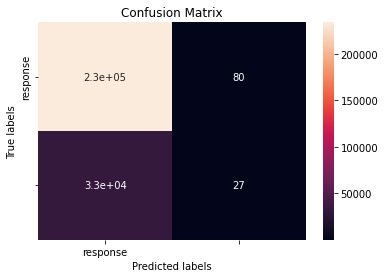

In [95]:
labels = ['response']
cm = confusion_matrix(Y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[100412     28]
 [ 13881     12]]


[Text(0, 0.5, 'Response')]

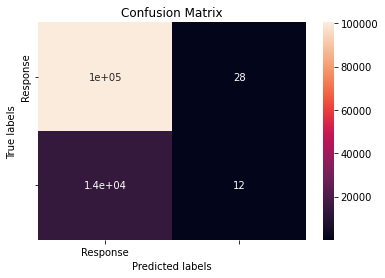

In [96]:
# Get the confusion matrix for both train and test

labels = ['Response']
cm = confusion_matrix(Y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [97]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,Y_train)

LogisticRegression()

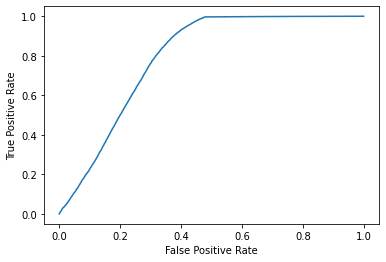

In [98]:
#define metrics
from sklearn import metrics
Y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


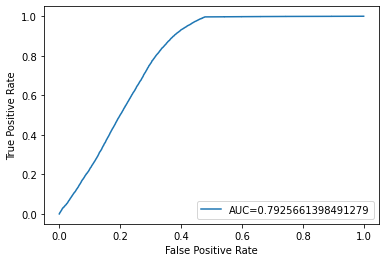

In [99]:
#define metrics
Y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [100]:
from sklearn.pipeline import make_pipeline


Feature: 0, Score: -0.15055
Feature: 1, Score: -0.35706
Feature: 2, Score: 0.00003
Feature: 3, Score: -5.55796
Feature: 4, Score: 8.30221
Feature: 5, Score: 0.00263
Feature: 6, Score: -0.84754
Feature: 7, Score: 0.00008


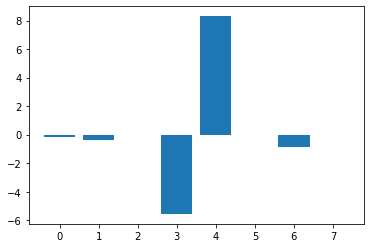

In [101]:
importance = log_regression.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [102]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [103]:
print(model.feature_importances_)


[0.01148639 0.08937146 0.09074674 0.1172377  0.14258794 0.19948201
 0.15349647 0.19559129]


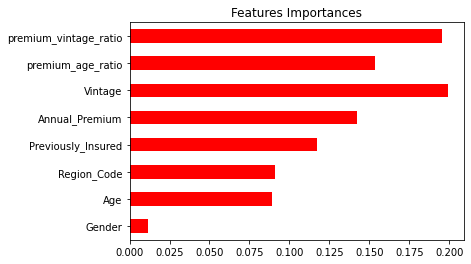

In [104]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Draw a horizontal barplot of importances_sorted
feat_importances.plot(kind='barh', color='red')
plt.title('Features Importances')
plt.show()


#Random Forest Classifier

In [105]:
# Number of trees
n_estimators = [20,60,80]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [20,80,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [20,40]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_features': max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
               'criterion':['entropy','gini']}

In [106]:
param_dict

{'criterion': ['entropy', 'gini'],
 'max_depth': [4, 6, 8],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [20, 40],
 'min_samples_split': [20, 80, 100],
 'n_estimators': [20, 60, 80]}

In [107]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   3.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   3.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   3.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=60; total time=   8.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=60; total time=   9.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=60; total time=   8.5s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, 

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [20, 40],
                         'min_samples_split': [20, 80, 100],
                         'n_estimators': [20, 60, 80]},
             scoring='roc_auc', verbose=2)

In [108]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=20,
                       min_samples_split=20, n_estimators=80)

In [109]:
rf_optimal_model = rf_grid.best_estimator_

In [110]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 20,
 'min_samples_split': 20,
 'n_estimators': 80}

In [111]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [112]:
len(train_preds)

266776

In [113]:
test_class_preds

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [115]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,train_class_preds)
test_accuracy = accuracy_score(Y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8769866854589619
The accuracy on test dataset is 0.8784865261997848


In [116]:
print (classification_report(Y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    100440
           1       0.00      0.00      0.00     13893

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



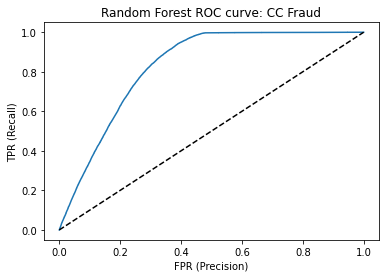

In [117]:
Y_score = rf_optimal_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test, Y_score)

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

# print ('Area under curve (AUC): ', format(round(auc(fpr,tpr),5)))

#KNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, Y_train)
knn_model

KNeighborsClassifier()

In [119]:
Y_pred_knn = knn_model.predict(X_test)

In [120]:
accuracy_score(Y_test, Y_pred_knn)

0.856087043985551

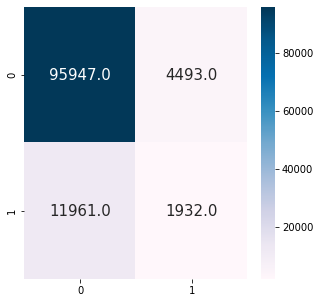

In [121]:
# Cofusion Matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [122]:
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92    100440
           1       0.30      0.14      0.19     13893

    accuracy                           0.86    114333
   macro avg       0.59      0.55      0.56    114333
weighted avg       0.82      0.86      0.83    114333



#XGBoost

In [123]:
xgb = XGBClassifier()

In [131]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

In [125]:
for column in cat_feat:
    X_train[column] = X_train[column].astype('int')
    X_test[column] = X_test[column].astype('int')

In [124]:
space={ 'max_depth': hp.quniform("max_depth", 3,18,1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 300,
        'seed': 0
      }

In [126]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, Y_train), ( X_test, Y_test)]
    
    clf.fit(X_train, Y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    y_score = rf_grid.predict_proba(X_test)[:,1]
    accuracy = accuracy_score(Y_test, pred>0.5)
    Roc_Auc_Score = roc_auc_score(Y_test, Y_score)
    print ("ROC-AUC Score:",Roc_Auc_Score)
    print ("SCORE:", accuracy)
    return {'loss': -Roc_Auc_Score, 'status': STATUS_OK }

In [127]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [128]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [129]:
trials = Trials()

In [132]:
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)


ROC-AUC Score:
0.8280071991163733
SCORE:
0.8784865261997848
ROC-AUC Score:
0.8280071991163733
SCORE:
0.8784865261997848
ROC-AUC Score:
0.8280071991163733
SCORE:
0.8784865261997848
ROC-AUC Score:
0.8280071991163733
SCORE:
0.8784865261997848
ROC-AUC Score:
0.8280071991163733
SCORE:
0.8784865261997848
ROC-AUC Score:
0.8280071991163733
SCORE:
0.8784865261997848
ROC-AUC Score:
0.8280071991163733
SCORE:
0.8784865261997848
ROC-AUC Score:
0.8280071991163733
SCORE:
0.8784865261997848
ROC-AUC Score:
0.8280071991163733
SCORE:
0.8784865261997848
ROC-AUC Score:
0.8280071991163733
SCORE:
0.8784865261997848
ROC-AUC Score:
0.8280071991163733
SCORE:
0.8784865261997848
ROC-AUC Score:
0.8280071991163733
SCORE:
0.8784865261997848
ROC-AUC Score:
0.8280071991163733
SCORE:
0.8784865261997848
ROC-AUC Score:
0.8280071991163733
SCORE:
0.8784865261997848
ROC-AUC Score:
0.8280071991163733
SCORE:
0.8784865261997848
ROC-AUC Score:
0.8280071991163733
SCORE:
0.8784865261997848
ROC-AUC Score:
0.8280071991163733
SCORE:

In [133]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7596378925845451, 'gamma': 5.396025595492711, 'max_depth': 9.0, 'min_child_weight': 6.0, 'reg_alpha': 165.0, 'reg_lambda': 0.5364169014468545}


In [134]:
xgb_model=xgb.XGBClassifier(n_estimators = space['n_estimators'], max_depth = 11, gamma = 2.381892812852242, reg_lambda = 0.016194264115558243,
                            reg_alpha = 57.0, min_child_weight=10.0,colsample_bytree = 0.5786479102658189 ,random_state = 0)

In [135]:
XGB_fit = xgb_model.fit(X_train, Y_train)
XGB_probability = XGB_fit.predict_proba(X_test)[:,1]
XGB_class = pd.DataFrame(XGB_fit.predict(X_test))

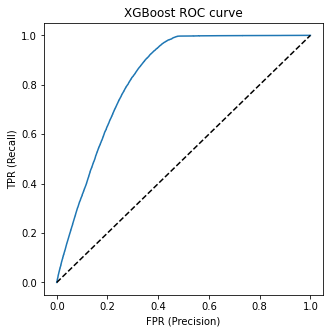

Area under curve (AUC):  0.83048


In [136]:
fpr, tpr, _ = roc_curve(Y_test, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', format(round(auc(fpr,tpr),5)))

#Conclusion


That's it! We reached the end of our exercise.
Starting with loading the data so far we have done EDA , null values treatment, encoding of categorical columns, feature selection and then model building.
The aim of our project was to classify whether customer will take vehicle insurance or not.

For classification, we created 4 classification models i.e. Logistic Regression, Random Forest, KNN and XGboost Classifier and calculated accuracy and AUC statistics. We observed that Logistic Regression 87% and AUC score is 77%                                                  
After that I perform Random forest Classifier an observe accuracy is 87.8% and KNN model accuracy score is 85.6%.                       
When we compare the Accuracy scores, XG boost gave the best rate with 87.85% and AUC score is 82.73%                           
We can conclude that overall, Random Forest and XGBoost  are better models at classifying our dataset.





**Based on the analysis above, the company's target audience for cross sale should be focused on customers who**

1. have vehicle damage
2. have a driver's license
3. have at least 2 years of vehicle age
4. are previously not insured
5. are between 33-50 years old with over 20% chance of having interest (The range is expandable)
6. are in regions where over 15% of the customers would have interest: 38, 28, 19, 4, 23, 51 (The range is expandable).
7. are approachable with the top policy sales channels: 36, 155, 163, 3, 121 (The range is expandable).
